In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import time


#Import and read csvs - please note that the csv files from kaggle were titled using the year the report was published.
#The date on the df title reflects the year the actual data applies to (i.e. the happiness2020.csv actually contains 2019 data)
file2018 = "happiness2018.csv"
file2019 = "happiness2019.csv"
file2020 = "happiness2020.csv"

hap2017_df = pd.read_csv(file2018)
hap2018_df = pd.read_csv(file2019)
hap2019_df = pd.read_csv(file2020)


In [14]:
#renaming "Country or region" in original 2018 file to "Country" for ease of merging
hap2017_df = hap2017_df.rename(columns={"Country or region": "Country"})

#drop unecessary columns:
clean_2017_df = hap2017_df.drop(columns = ["Overall rank"])
clean_2017_df

,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...
151,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038


In [15]:
#renaming "Country or region" in original 2019 file to "Country" for ease of merging
hap2018_df = hap2018_df.rename(columns={"Country or region": "Country"})

#drop unecessary columns:
clean_2018_df = hap2018_df.drop(columns = ["Overall rank"])


#add year column to hap2019_df
#hap2019_df['Year'] = "2017"
#hap2019_df['Year'] = pd.to_numeric(hap2019_df['Year'])


In [16]:
#drop columns we dont need in 2020 data and rename "Country name" column to "Country" for ease of merging
hap2019_df = hap2019_df.rename(columns={"Country name": "Country"})

#drop unecessary columns:
clean_2019_df = hap2019_df.drop(columns = ["Standard error of ladder score", 
                                           "Logged GDP per capita", 
                                           "upperwhisker", 
                                           "lowerwhisker", 
                                           "Ladder score in Dystopia", 
                                           "Dystopia + residual", 
                                           "Social support", 
                                           "Healthy life expectancy", 
                                           "Freedom to make life choices", 
                                           "Generosity", 
                                           "Perceptions of corruption"])


#rename columns:
clean_2019_df = clean_2019_df.rename(columns=
                             {"Explained by: Log GDP per capita":"GDP per capita 2019",
                              "Explained by: Social support":"Social support 2019",
                              "Explained by: Healthy life expectancy": "Healthy life expectancy 2019",
                              "Explained by: Freedom to make life choices": "Freedom to make life choices 2019",
                              "Explained by: Generosity":"Generosity 2019", 
                              "Explained by: Perceptions of corruption": "Perceptions of corruption 2019",
                              "Ladder score": "Score 2019"
                              })


clean_2019_df


,Country,Regional indicator,Score 2019,GDP per capita 2019,Social support 2019,Healthy life expectancy 2019,Freedom to make life choices 2019,Generosity 2019,Perceptions of corruption 2019
0,Finland,Western Europe,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857
1,Denmark,Western Europe,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260
2,Switzerland,Western Europe,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946
3,Iceland,Western Europe,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541
4,Norway,Western Europe,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101
...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265
149,Rwanda,Sub-Saharan Africa,3.3123,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929
151,South Sudan,Sub-Saharan Africa,2.8166,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157


In [17]:
#ran counts for all dataframes to determine if there was any missing info. none were found:
#clean_2017_df.count()
#clean_2018_df.count()
#clean_2019_df.count()


In [18]:
#analyzed data types for each column in each dataframe. All items are floats except for regional indicator and country name, which makes sense.
#clean_2017_df.dtypes
#clean_2018_df.dtypes
clean_2019_df.dtypes

Country                               object
Regional indicator                    object
Score 2019                           float64
GDP per capita 2019                  float64
Social support 2019                  float64
Healthy life expectancy 2019         float64
Freedom to make life choices 2019    float64
Generosity 2019                      float64
Perceptions of corruption 2019       float64
dtype: object

In [19]:
#no further cleaning of our 2018,2019 and 2020 data is needed. Now we can merge the files. 
merge1_df = pd.merge(clean_2017_df, clean_2018_df, on = "Country", how = "inner", suffixes=(" 2017", " 2018"))
merge1_df

,Country,Score 2017,GDP per capita 2017,Social support 2017,Healthy life expectancy 2017,Freedom to make life choices 2017,Generosity 2017,Perceptions of corruption 2017,Score 2018,GDP per capita 2018,Social support 2018,Healthy life expectancy 2018,Freedom to make life choices 2018,Generosity 2018,Perceptions of corruption 2018
0,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,7.554,1.488,1.582,1.028,0.603,0.271,0.341
2,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,7.480,1.452,1.526,1.052,0.572,0.263,0.343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064,3.380,0.287,1.163,0.463,0.143,0.108,0.077
148,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097,3.231,0.476,0.885,0.499,0.417,0.276,0.147
149,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106,2.853,0.306,0.575,0.295,0.010,0.202,0.091
150,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [20]:
#merge 2019 data into 2017_2018 df:
merge2_df = pd.merge(merge1_df, clean_2019_df, on = "Country", how = "inner")
merge2_df

,Country,Score 2017,GDP per capita 2017,Social support 2017,Healthy life expectancy 2017,Freedom to make life choices 2017,Generosity 2017,Perceptions of corruption 2017,Score 2018,GDP per capita 2018,...,Generosity 2018,Perceptions of corruption 2018,Regional indicator,Score 2019,GDP per capita 2019,Social support 2019,Healthy life expectancy 2019,Freedom to make life choices 2019,Generosity 2019,Perceptions of corruption 2019
0,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,7.769,1.340,...,0.153,0.393,Western Europe,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857
1,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,7.554,1.488,...,0.271,0.341,Western Europe,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101
2,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,7.600,1.383,...,0.252,0.410,Western Europe,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260
3,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,7.494,1.380,...,0.354,0.118,Western Europe,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541
4,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,7.480,1.452,...,0.263,0.343,Western Europe,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064,3.380,0.287,...,0.108,0.077,Middle East and North Africa,3.5274,0.392702,1.177477,0.415000,0.243721,0.094689,0.087352
140,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097,3.231,0.476,...,0.276,0.147,Sub-Saharan Africa,3.4762,0.457163,0.872675,0.442678,0.509343,0.271541,0.203881
141,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106,2.853,0.306,...,0.202,0.091,Sub-Saharan Africa,2.8166,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157
142,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038,3.083,0.026,...,0.235,0.035,Sub-Saharan Africa,3.4759,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265


In [21]:
merge2_df.count()

#we have decided to keep the 2017 perceptions of corruption cell blank for United Arab Emirates. Further action TBD during analysis.

Country                              144
Score 2017                           144
GDP per capita 2017                  144
Social support 2017                  144
Healthy life expectancy 2017         144
Freedom to make life choices 2017    144
Generosity 2017                      144
Perceptions of corruption 2017       143
Score 2018                           144
GDP per capita 2018                  144
Social support 2018                  144
Healthy life expectancy 2018         144
Freedom to make life choices 2018    144
Generosity 2018                      144
Perceptions of corruption 2018       144
Regional indicator                   144
Score 2019                           144
GDP per capita 2019                  144
Social support 2019                  144
Healthy life expectancy 2019         144
Freedom to make life choices 2019    144
Generosity 2019                      144
Perceptions of corruption 2019       144
dtype: int64

In [22]:
#final dataframe complete
final_df = merge2_df.copy()

#move regional indicator column next to country
cols_to_order = ['Country', 'Regional indicator']
new_columns = cols_to_order + (final_df.columns.drop(cols_to_order).tolist())
final_df = final_df[new_columns]

final_df #matches merge2_df with columns reordered

,Country,Regional indicator,Score 2017,GDP per capita 2017,Social support 2017,Healthy life expectancy 2017,Freedom to make life choices 2017,Generosity 2017,Perceptions of corruption 2017,Score 2018,...,Freedom to make life choices 2018,Generosity 2018,Perceptions of corruption 2018,Score 2019,GDP per capita 2019,Social support 2019,Healthy life expectancy 2019,Freedom to make life choices 2019,Generosity 2019,Perceptions of corruption 2019
0,Finland,Western Europe,7.632,1.305,1.592,0.874,0.681,0.202,0.393,7.769,...,0.596,0.153,0.393,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857
1,Norway,Western Europe,7.594,1.456,1.582,0.861,0.686,0.286,0.340,7.554,...,0.603,0.271,0.341,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101
2,Denmark,Western Europe,7.555,1.351,1.590,0.868,0.683,0.284,0.408,7.600,...,0.592,0.252,0.410,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260
3,Iceland,Western Europe,7.495,1.343,1.644,0.914,0.677,0.353,0.138,7.494,...,0.591,0.354,0.118,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541
4,Switzerland,Western Europe,7.487,1.420,1.549,0.927,0.660,0.256,0.357,7.480,...,0.572,0.263,0.343,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Yemen,Middle East and North Africa,3.355,0.442,1.073,0.343,0.244,0.083,0.064,3.380,...,0.143,0.108,0.077,3.5274,0.392702,1.177477,0.415000,0.243721,0.094689,0.087352
140,Tanzania,Sub-Saharan Africa,3.303,0.455,0.991,0.381,0.481,0.270,0.097,3.231,...,0.417,0.276,0.147,3.4762,0.457163,0.872675,0.442678,0.509343,0.271541,0.203881
141,South Sudan,Sub-Saharan Africa,3.254,0.337,0.608,0.177,0.112,0.224,0.106,2.853,...,0.010,0.202,0.091,2.8166,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157
142,Central African Republic,Sub-Saharan Africa,3.083,0.024,0.000,0.010,0.305,0.218,0.038,3.083,...,0.225,0.235,0.035,3.4759,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265


In [11]:
#export dataframe to csv
#final_df.to_csv(r'Final_DF.csv')

In [12]:
#create new df with averages
#group by country
#agg

#groupby_country_df = final_df.groupby(['Country']).mean()
#groupby_country_df

score_avg = final_df[['Score 2017','Score 2018','Score 2019']].mean(axis=1)
gdp_avg = final_df[['GDP per capita 2017', 'GDP per capita 2018','GDP per capita 2017']].mean(axis=1)
social_support_avg = final_df[['Social support 2017','Social support 2018','Social support 2019']].mean(axis=1)
life_exp_avg = final_df[['Healthy life expectancy 2017','Healthy life expectancy 2018','Healthy life expectancy 2019']].mean(axis=1)
generosity_avg = final_df[['Generosity 2017','Generosity 2018','Generosity 2019']].mean(axis=1)
freedom_avg = final_df[['Freedom to make life choices 2017','Freedom to make life choices 2018','Freedom to make life choices 2019']].mean(axis=1)
corruption_avg = final_df[['Perceptions of corruption 2017','Perceptions of corruption 2018','Perceptions of corruption 2019']].mean(axis=1)

average_df = pd.DataFrame({'Country': final_df['Country'],
                           'Region': final_df['Regional indicator'],
                           'Score Average': score_avg, 
                           'GDP per Capita Average': gdp_avg,
                           'Social Support Average': social_support_avg,
                           'Healthy Life Expectancy Average': life_exp_avg,
                           'Generosity Average': generosity_avg,
                           'Freedom to Make Life Choices Average': freedom_avg,
                           'Perceptions of Corruption Average': corruption_avg                         
                           })

average_df.round(2)
      

,Country,Region,Score Average,GDP per Capita Average,Social Support Average,Healthy Life Expectancy Average,Generosity Average,Freedom to Make Life Choices Average,Perceptions of Corruption Average
0,Finland,Western Europe,7.74,1.32,1.56,0.94,0.17,0.65,0.42
1,Norway,Western Europe,7.55,1.47,1.55,0.97,0.28,0.65,0.37
2,Denmark,Western Europe,7.60,1.36,1.56,0.95,0.26,0.65,0.44
3,Iceland,Western Europe,7.50,1.36,1.61,0.98,0.36,0.64,0.13
4,Switzerland,Western Europe,7.51,1.43,1.52,1.01,0.26,0.62,0.37
...,...,...,...,...,...,...,...,...,...
139,Yemen,Middle East and North Africa,3.42,0.39,1.14,0.41,0.10,0.21,0.08
140,Tanzania,Sub-Saharan Africa,3.34,0.46,0.92,0.44,0.27,0.47,0.15
141,South Sudan,Sub-Saharan Africa,2.97,0.33,0.58,0.23,0.21,0.06,0.10
142,Central African Republic,Sub-Saharan Africa,3.21,0.02,0.00,0.04,0.24,0.27,0.03


In [13]:
#export dataframe to csv
#average_df.to_csv(r'Average_DF.csv')

In [14]:
averagesorted_df = average_df.sort_values(['Score Average'], ascending=False).groupby('Country').head()
averagesorted_df

,Country,Region,Score Average,GDP per Capita Average,Social Support Average,Healthy Life Expectancy Average,Generosity Average,Freedom to Make Life Choices Average,Perceptions of Corruption Average
0,Finland,Western Europe,7.736567,1.316667,1.559509,0.940424,0.171557,0.646439,0.421286
2,Denmark,Western Europe,7.600200,1.361667,1.555483,0.947778,0.259598,0.646680,0.437753
1,Norway,Western Europe,7.545333,1.466667,1.553058,0.965691,0.281662,0.653067,0.371700
4,Switzerland,Western Europe,7.508967,1.430667,1.515801,1.006511,0.262685,0.620318,0.369315
3,Iceland,Western Europe,7.497833,1.355333,1.605189,0.980281,0.356443,0.643327,0.133514
...,...,...,...,...,...,...,...,...,...
138,Rwanda,Sub-Saharan Africa,3.351433,0.341000,0.709959,0.528794,0.217568,0.598363,0.446847
140,Tanzania,Sub-Saharan Africa,3.336733,0.462000,0.916225,0.440893,0.272514,0.469114,0.149294
142,Central African Republic,Sub-Saharan Africa,3.213967,0.024667,0.000000,0.038333,0.235504,0.274271,0.033755
133,Afghanistan,South Asia,3.133967,0.338000,0.470145,0.294017,0.161412,0.028333,0.020742


In [15]:
top10_df = average_df.head(10)
last10_df = average_df.tail(10)
last10_df


,Country,Region,Score Average,GDP per Capita Average,Social Support Average,Healthy Life Expectancy Average,Generosity Average,Freedom to Make Life Choices Average,Perceptions of Corruption Average
134,Botswana,Sub-Saharan Africa,3.518967,1.025000,1.134898,0.483034,0.033469,0.507030,0.097929
135,Malawi,Sub-Saharan Africa,3.511667,0.187667,0.543789,0.415721,0.213728,0.487130,0.100211
136,Haiti,Latin America and Caribbean,3.633267,0.317667,0.682890,0.370789,0.424970,0.073433,0.125312
137,Liberia,Sub-Saharan Africa,4.009300,0.075000,0.900245,0.367428,0.221989,0.398314,0.038047
138,Rwanda,Sub-Saharan Africa,3.351433,0.341000,0.709959,0.528794,0.217568,0.598363,0.446847
139,Yemen,Middle East and North Africa,3.420800,0.390333,1.137826,0.407000,0.095230,0.210240,0.076117
140,Tanzania,Sub-Saharan Africa,3.336733,0.462000,0.916225,0.440893,0.272514,0.469114,0.149294
141,South Sudan,Sub-Saharan Africa,2.974533,0.326667,0.578760,0.226936,0.211978,0.062536,0.102719
142,Central African Republic,Sub-Saharan Africa,3.213967,0.024667,0.000000,0.038333,0.235504,0.274271,0.033755
143,Burundi,Sub-Saharan Africa,3.485100,0.076000,0.492525,0.273404,0.170801,0.186800,0.156062


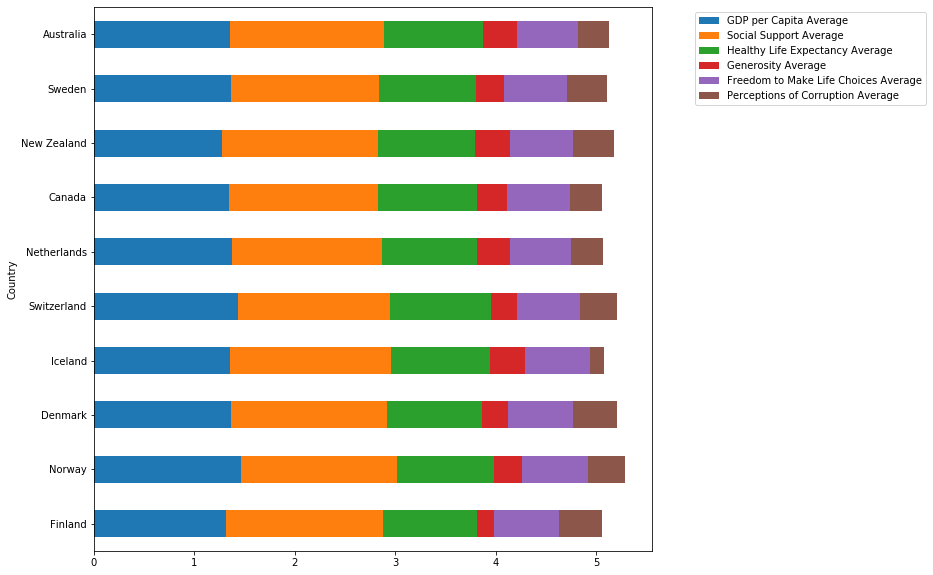

In [16]:
#created bar chart for each SWB for the 10 countries with the highest overall happiness score

test_df = top10_df[['Country','GDP per Capita Average','Social Support Average', 'Healthy Life Expectancy Average','Generosity Average','Freedom to Make Life Choices Average','Perceptions of Corruption Average']]
test_df.index = test_df['Country']

#test_df.sort_values(['Score Average'], ascending = False)  #doesnt like this

test_df.plot(kind='barh', stacked=True, figsize = (10,10))

plt.legend(bbox_to_anchor = (1,.5,.5,.5))

plt.show()



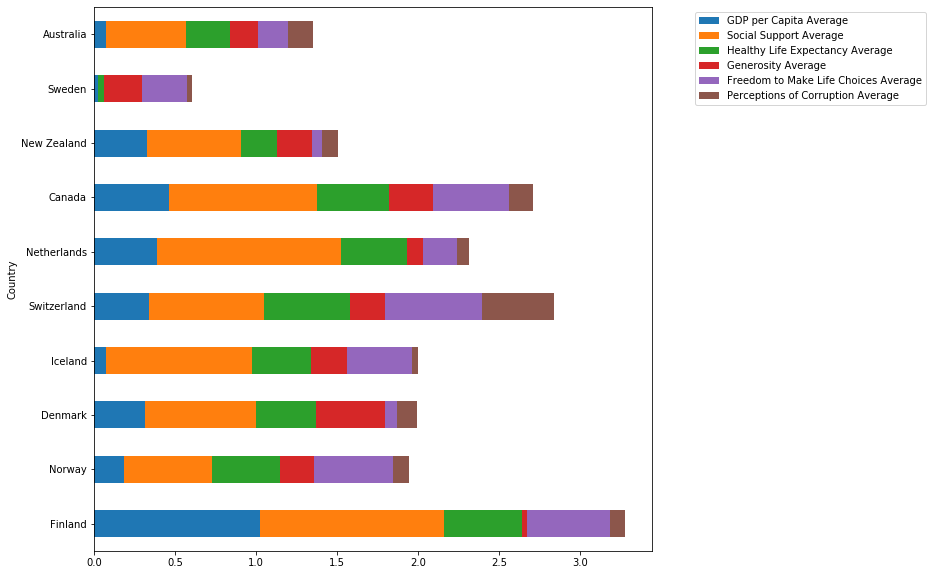

In [17]:
#created bar chart for each SWB for the 10 countries with the lowest overall happiness score

test2_df = last10_df[['Country','GDP per Capita Average','Social Support Average', 'Healthy Life Expectancy Average','Generosity Average','Freedom to Make Life Choices Average','Perceptions of Corruption Average']]
test2_df.index = test_df['Country']
test2_df.plot(kind='barh', stacked=True, figsize = (10,10))

plt.legend(bbox_to_anchor = (1,.5,.5,.5))

plt.show()



In [30]:
#Create a boxplot for each SWB 
# Calculate the IQR and quantitatively determine if there are any potential outliers for
# 'GDP per Capita Average','Social Support Average', 'Healthy Life Expectancy Average','
#  Generosity Average','Freedom to Make Life Choices Average','Perceptions of Corruption Average'

In [31]:
# "GDP per Capita Average"
quartiles = averagesorted_df["GDP per Capita Average"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.") 
print(f"Values above {upper_bound} could be outliers.")

print(f"The lower quartile of GDP per Capita Average is: {lowerq}") 
print(f"The upper quartile of GDP per Capita Average is: {upperq}") 
print(f"The interquartile range of GDP per Capita Average is: {iqr}") 
print(f"The the median of GDP per Capita Average is: {quartiles[0.5]} ")

# Find the non outlier rows
GDP_nonoutlier = averagesorted_df.loc[(averagesorted_df["GDP per Capita Average"] > lower_bound)
                              | (averagesorted_df["GDP per Capita Average"] < upper_bound)] 
GDP_bplot = GDP_nonoutlier["GDP per Capita Average"]

Values below -0.30741666666666656 could be outliers.
Values above 2.08725 could be outliers.
The lower quartile of GDP per Capita Average is: 0.5905833333333333
The upper quartile of GDP per Capita Average is: 1.18925
The interquartile range of GDP per Capita Average is: 0.5986666666666666
The the median of GDP per Capita Average is: 0.9575 


In [32]:
# "Social Support Average"
quartiles = averagesorted_df["Social Support Average"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.") 
print(f"Values above {upper_bound} could be outliers.")

print(f"The lower quartile of Social Support Average is: {lowerq}") 
print(f"The upper quartile of Social Support Average is: {upperq}") 
print(f"The interquartile range of Social Support Average is: {iqr}") 
print(f"The the median of Social Support Average is: {quartiles[0.5]} ")

# Find the non outlier rows
SocSuppAvg_nonoutlier = averagesorted_df.loc[(averagesorted_df["Social Support Average"] > lower_bound)
                              | (averagesorted_df["Social Support Average"] < upper_bound)] 
SocSupp_bplot = SocSuppAvg_nonoutlier["Social Support Average"]

Values below 0.41035482775 could be outliers.
Values above 2.0553496410833336 could be outliers.
The lower quartile of Social Support Average is: 1.02722788275
The upper quartile of Social Support Average is: 1.4384765860833335
The interquartile range of Social Support Average is: 0.4112487033333334
The the median of Social Support Average is: 1.2449451408333334 


In [33]:
# "Healthy Life Expectancy Average"
quartiles = averagesorted_df["Healthy Life Expectancy Average"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.") 
print(f"Values above {upper_bound} could be outliers.")

print(f"The lower quartile of Healthy Life Expectancy Average is: {lowerq}") 
print(f"The upper quartile of Healthy Life Expectancy Average is: {upperq}") 
print(f"The interquartile range of Healthy Life Expectancy Average is: {iqr}") 
print(f"The the median of Healthy Life Expectancy Average is: {quartiles[0.5]} ")

# Find the non outlier rows
HLE_nonoutlier = averagesorted_df.loc[(averagesorted_df["Healthy Life Expectancy Average"] > lower_bound)
                              | (averagesorted_df["Healthy Life Expectancy Average"] < upper_bound)] 
HLE_bplot = HLE_nonoutlier["Healthy Life Expectancy Average"]

Values below -0.027528185333333233 could be outliers.
Values above 1.3607041999999998 could be outliers.
The lower quartile of Healthy Life Expectancy Average is: 0.49305895916666664
The upper quartile of Healthy Life Expectancy Average is: 0.8401170554999999
The interquartile range of Healthy Life Expectancy Average is: 0.3470580963333333
The the median of Healthy Life Expectancy Average is: 0.742346561 


In [34]:
# "Generosity Average"
quartiles = averagesorted_df["Generosity Average"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.") 
print(f"Values above {upper_bound} could be outliers.")

print(f"The lower quartile of Generosity Average is: {lowerq}") 
print(f"The upper quartile of Generosity Average is: {upperq}") 
print(f"The interquartile range of Generosity Average is: {iqr}") 
print(f"The the median of Generosity Average is: {quartiles[0.5]} ")

# Find the non outlier rows
Generosity_nonoutlier = averagesorted_df.loc[(averagesorted_df["Generosity Average"] > lower_bound)
                              | (averagesorted_df["Generosity Average"] < upper_bound)] 
Generosity_bplot = Generosity_nonoutlier["Generosity Average"]

Values below -0.10342273324999995 could be outliers.
Values above 0.4577249114166666 could be outliers.
The lower quartile of Generosity Average is: 0.1070076335
The upper quartile of Generosity Average is: 0.24729454466666664
The interquartile range of Generosity Average is: 0.14028691116666664
The the median of Generosity Average is: 0.17258232166666668 


In [35]:
# "Freedom to Make Life Choices Average"
quartiles = averagesorted_df["Freedom to Make Life Choices Average"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.") 
print(f"Values above {upper_bound} could be outliers.")

print(f"The lower quartile of Freedom to Make Life Choices Average is: {lowerq}") 
print(f"The upper quartile of Freedom to Make Life Choices Average is: {upperq}") 
print(f"The interquartile range of Freedom to Make Life Choices Average is: {iqr}") 
print(f"The the median of Freedom to Make Life Choices Average is: {quartiles[0.5]} ")

# Find the non outlier rows
Freedom_nonoutlier = averagesorted_df.loc[(averagesorted_df["Freedom to Make Life Choices Average"] > lower_bound)
                              | (averagesorted_df["Freedom to Make Life Choices Average"] < upper_bound)] 
Freedom_bplot = Freedom_nonoutlier["Freedom to Make Life Choices Average"]

Values below 0.058939539416666686 could be outliers.
Values above 0.8406101854166667 could be outliers.
The lower quartile of Freedom to Make Life Choices Average is: 0.35206603166666667
The upper quartile of Freedom to Make Life Choices Average is: 0.5474836931666667
The interquartile range of Freedom to Make Life Choices Average is: 0.1954176615
The the median of Freedom to Make Life Choices Average is: 0.455148617 


In [36]:
# "Perceptions of Corruption Average"
quartiles = averagesorted_df["Perceptions of Corruption Average"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.") 
print(f"Values above {upper_bound} could be outliers.")

print(f"The lower quartile of Perceptions of Corruption Average is: {lowerq}") 
print(f"The upper quartile of Perceptions of Corruption Average is: {upperq}") 
print(f"The interquartile range of Perceptions of Corruption Average is: {iqr}") 
print(f"The the median of Perceptions of Corruption Average is: {quartiles[0.5]} ")

# Find the non outlier rows
Corruption_nonoutlier = averagesorted_df.loc[(averagesorted_df["Perceptions of Corruption Average"] > lower_bound)
                              | (averagesorted_df["Perceptions of Corruption Average"] < upper_bound)] 
Corruption_bplot = Corruption_nonoutlier["Perceptions of Corruption Average"]

Values below -0.07663687654166669 could be outliers.
Values above 0.2721223284583334 could be outliers.
The lower quartile of Perceptions of Corruption Average is: 0.05414782533333333
The upper quartile of Perceptions of Corruption Average is: 0.14133762658333335
The interquartile range of Perceptions of Corruption Average is: 0.08718980125000002
The the median of Perceptions of Corruption Average is: 0.08973172866666668 


In [ ]:
#creating function that accepts parameters needed for the scatter
def line_regression_plot(x_values, y_values, x_desc, y_desc, 
                    Determinant, file_name, x_notation, y_notation):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values,s= 60, color="orange", edgecolor ="navy")
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_notation, y_notation),fontsize=14,color="black")
    plt.title(f"{Determinant}-\n {x_desc} and {y_desc} Regression")
    plt.xlabel(x_desc)
    plt.ylabel(y_desc)
    plt.grid(True)
    print(f'The r_squared value is: {(rvalue**2).round(2)}')
    print(f'The slope is: {(slope).round(2)} and intercept is: {(intercept).round(2)}')
    print(f'The p value is {(pvalue).round(3)}')
    print(line_eq)
    plt.savefig(file_name)
    plt.show

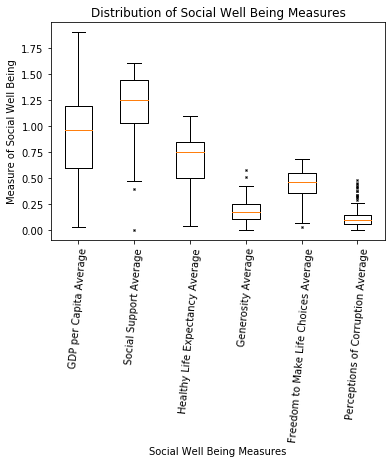

In [84]:
# Generate a box plot for each SWB
to_plot = [GDP_bplot, SocSupp_bplot, HLE_bplot, Generosity_bplot, Freedom_bplot, Corruption_bplot]
fig1, axl = plt.subplots()

style = dict(markerfacecolor='black', markersize= "2", marker= "x")
axl.boxplot(to_plot, labels=["GDP per Capita Average", "Social Support Average","Healthy Life Expectancy Average",
                             "Generosity Average", "Freedom to Make Life Choices Average",
                             "Perceptions of Corruption Average"], flierprops = style)

plt.xticks(rotation=85)
plt.title("Distribution of Social Well Being Measures")
plt.xlabel("Social Well Being Measures")
plt.ylabel("Measure of Social Well Being")

plt.show()

In [38]:
# Run Correlations for the SWB
average_df.corr(method = "pearson")


,Score Average,GDP per Capita Average,Social Support Average,Healthy Life Expectancy Average,Generosity Average,Freedom to Make Life Choices Average,Perceptions of Corruption Average
Score Average,1.000000,0.807388,0.774377,0.798818,0.112926,0.569723,0.439359
GDP per Capita Average,0.807388,1.000000,0.744840,0.848141,-0.058766,0.393532,0.352392
Social Support Average,0.774377,0.744840,1.000000,0.735922,-0.001536,0.449281,0.239814
Healthy Life Expectancy Average,0.798818,0.848141,0.735922,1.000000,-0.031951,0.412639,0.348450
Generosity Average,0.112926,-0.058766,-0.001536,-0.031951,1.000000,0.301899,0.316261
Freedom to Make Life Choices Average,0.569723,0.393532,0.449281,0.412639,0.301899,1.000000,0.461814
Perceptions of Corruption Average,0.439359,0.352392,0.239814,0.348450,0.316261,0.461814,1.000000


In [39]:
average_df.corr(method = "pearson")["Score Average"]

Score Average                           1.000000
GDP per Capita Average                  0.807388
Social Support Average                  0.774377
Healthy Life Expectancy Average         0.798818
Generosity Average                      0.112926
Freedom to Make Life Choices Average    0.569723
Perceptions of Corruption Average       0.439359
Name: Score Average, dtype: float64

In [ ]:
data = average_df.corr(method = "pearson")["Score Average"]
plt.matshow(data.corr())
plt.show()

The r_squared value is: 0.6
The slope is: 2.96 and intercept is: 1.9
The p value is 0.0
y = 2.96x + 1.9


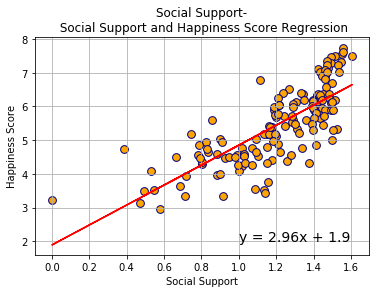

In [22]:
#scatter plot - Social Support vs. Happiness Score
line_regression_plot(average_df["Social Support Average"],average_df["Score Average"],
                  "Social Support", "Happiness Score","Social Support",
                 'Social_Support_vs_Happiness.png',1, 2)

The r_squared value is: 0.64
The slope is: 3.68 and intercept is: 2.95
The p value is 0.0
y = 3.68x + 2.95


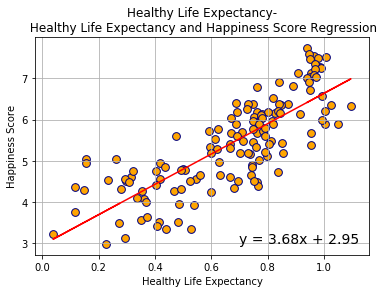

In [23]:
#scatter plot - Healthy Life Expectancy Average vs. Happiness Score
line_regression_plot(average_df["Healthy Life Expectancy Average"],average_df["Score Average"],
                  "Healthy Life Expectancy", "Happiness Score","Healthy Life Expectancy",
                 'Life_Expectancy_vs_Happiness.png',0.7, 3)


The r_squared value is: 0.01
The slope is: 1.3 and intercept is: 5.2
The p value is 0.178
y = 1.3x + 5.2


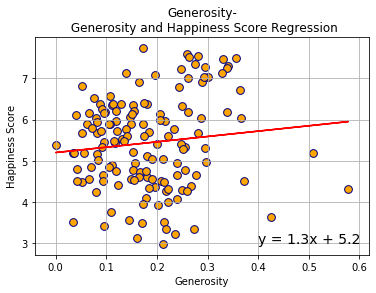

In [24]:
#scatter plot - Generosity Average vs. Happiness Score
line_regression_plot(average_df["Generosity Average"],average_df["Score Average"],
                  "Generosity", "Happiness Score","Generosity",
                 'Generosity_vs_Happiness.png',0.4, 3)


The r_squared value is: 0.32
The slope is: 4.47 and intercept is: 3.47
The p value is 0.0
y = 4.47x + 3.47


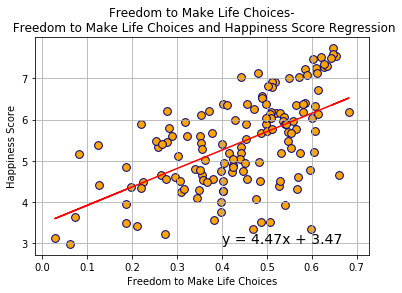

In [25]:
#scatter plot - Freedom to Make Life Choices Average vs. Happiness Score
line_regression_plot(average_df["Freedom to Make Life Choices Average"],average_df["Score Average"],
                  "Freedom to Make Life Choices", "Happiness Score","Freedom to Make Life Choices",
                 'Freedom_Life_Choices_vs_Happiness.png',0.4, 3)


The r_squared value is: 0.19
The slope is: 4.88 and intercept is: 4.87
The p value is 0.0
y = 4.88x + 4.87


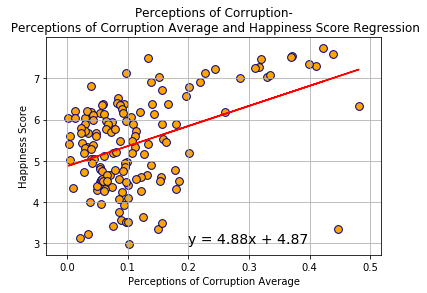

In [26]:
#scatter plot - Perceptions of Corruption Average vs. Happiness Score
line_regression_plot(average_df["Perceptions of Corruption Average"], average_df["Score Average"],
                    "Perceptions of Corruption Average", "Happiness Score","Perceptions of Corruption",
                     'Percep_corruption_vs_Happiness.png',0.2, 3)
